In [342]:
#importes

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.model_selection import LeaveOneOut, cross_validate
from sklearn.utils import resample



In [343]:
# ================================================================
# APRAU - Step 1
# Exploratory Data Analysis (EDA) - Descriptive Statistics
# ================================================================

import pandas as pd
import numpy as np

# 1. Carregar o dataset
df = pd.read_csv("group_21.csv")

print(f"Dimensões do dataset: {df.shape[0]} linhas e {df.shape[1]} colunas")
df.head()


# 2. Estatísticas Descritivas
desc_stats = df.describe(include='all')
print("Estatísticas Descritivas:")
print(desc_stats)

#info do dataframe
print("Informações do DataFrame:")
df.info()

# 4. Medianas e modas
medians = df.median(numeric_only=True)
modes = df.mode().iloc[0]
print("Medianas das colunas numéricas:")
print(medians)
print("Modas das colunas:")
print(modes)

# 3. Verificar valores ausentes
missing_values = df.isnull().sum()
print("Valores ausentes por coluna:")
print(missing_values)
# 5. Percentagem de missing values
missing_percentage = (missing_values / len(df)) * 100
print("Percentagem de valores ausentes por coluna:")
print(missing_percentage)

# 6. Estatísticas adicionais
print("Estatísticas adicionais:")
df.describe(include='all')



# 4. Análise de Distribuição
#import matplotlib.pyplot as plt
#import seaborn as sns
#numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
#for col in numeric_cols:
    #plt.figure(figsize=(10, 4))
    #sns.histplot(df[col].dropna(), kde=True)
    #plt.title(f'Distribuição de {col}')
    #plt.xlabel(col)
    #plt.ylabel('Frequência')
    #plt.show()



Dimensões do dataset: 2999 linhas e 49 colunas
Estatísticas Descritivas:
         duration_1   duration_2   duration_3   duration_4   duration_5  \
count   2999.000000  2999.000000  2999.000000  2999.000000  2999.000000   
unique          NaN          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN          NaN   
mean       0.142381     0.236412     0.303101     0.286429     0.031677   
std        0.349499     0.424949     0.459675     0.452168     0.175169   
min        0.000000     0.000000     0.000000     0.000000     0.000000   
25%        0.000000     0.000000     0.000000     0.000000     0.000000   
50%        0.000000     0.000000     0.000000     0.000000     0.000000   
75%        0.000000     0.000000     1.000000     1.000000     0.000000   
max        1.000000     1.000000     1.000000     1.000000     1.000000   

        loudness_level  po

,duration_1,duration_2,duration_3,duration_4,duration_5,loudness_level,popularity_level,tempo_class,time_signature,key_mode,...,is_instrumental,is_dance_hit,temp_zscore,resonance_factor,timbre_index,echo_constant,distorted_movement,signal_power,target_class,target_regression
count,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,...,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.0,2999.000000,2999.000000,2999,2999.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,class_50,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000,NaN
mean,0.142381,0.236412,0.303101,0.286429,0.031677,1.892964,1.918973,1.067689,-0.017110,0.027457,...,0.054018,0.000333,0.232109,0.026228,0.500928,1.0,-0.029450,0.663530,NaN,0.114240
std,0.349499,0.424949,0.459675,0.452168,0.175169,1.346634,1.083152,0.335402,0.942046,1.025497,...,0.226091,0.018260,1.026877,0.992290,0.287603,0.0,1.030189,0.253321,NaN,0.966111
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.024149,-1.511882,...,0.000000,0.000000,-4.074538,-3.281219,0.000015,1.0,-3.266071,0.000020,NaN,-1.490205
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.221824,-0.920961,...,0.000000,0.000000,-0.660368,-0.620687,0.252709,1.0,-0.678802,0.479000,NaN,-0.548707
50%,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,1.000000,0.221824,0.176466,...,0.000000,0.000000,0.530461,0.046840,0.498270,1.0,0.070296,0.703000,NaN,0.303126
75%,0.000000,0.000000,1.000000,1.000000,0.000000,3.000000,3.000000,1.000000,0.221824,1.020640,...,0.000000,0.000000,0.930934,0.682035,0.751504,1.0,0.732960,0.893000,NaN,0.751458


In [344]:
# Substituir vírgulas por pontos e converter para float
for col in df.columns:
    if df[col].dtype == 'object':
        try:
            df[col] = df[col].str.replace(',', '.').astype(float)
        except:
            pass

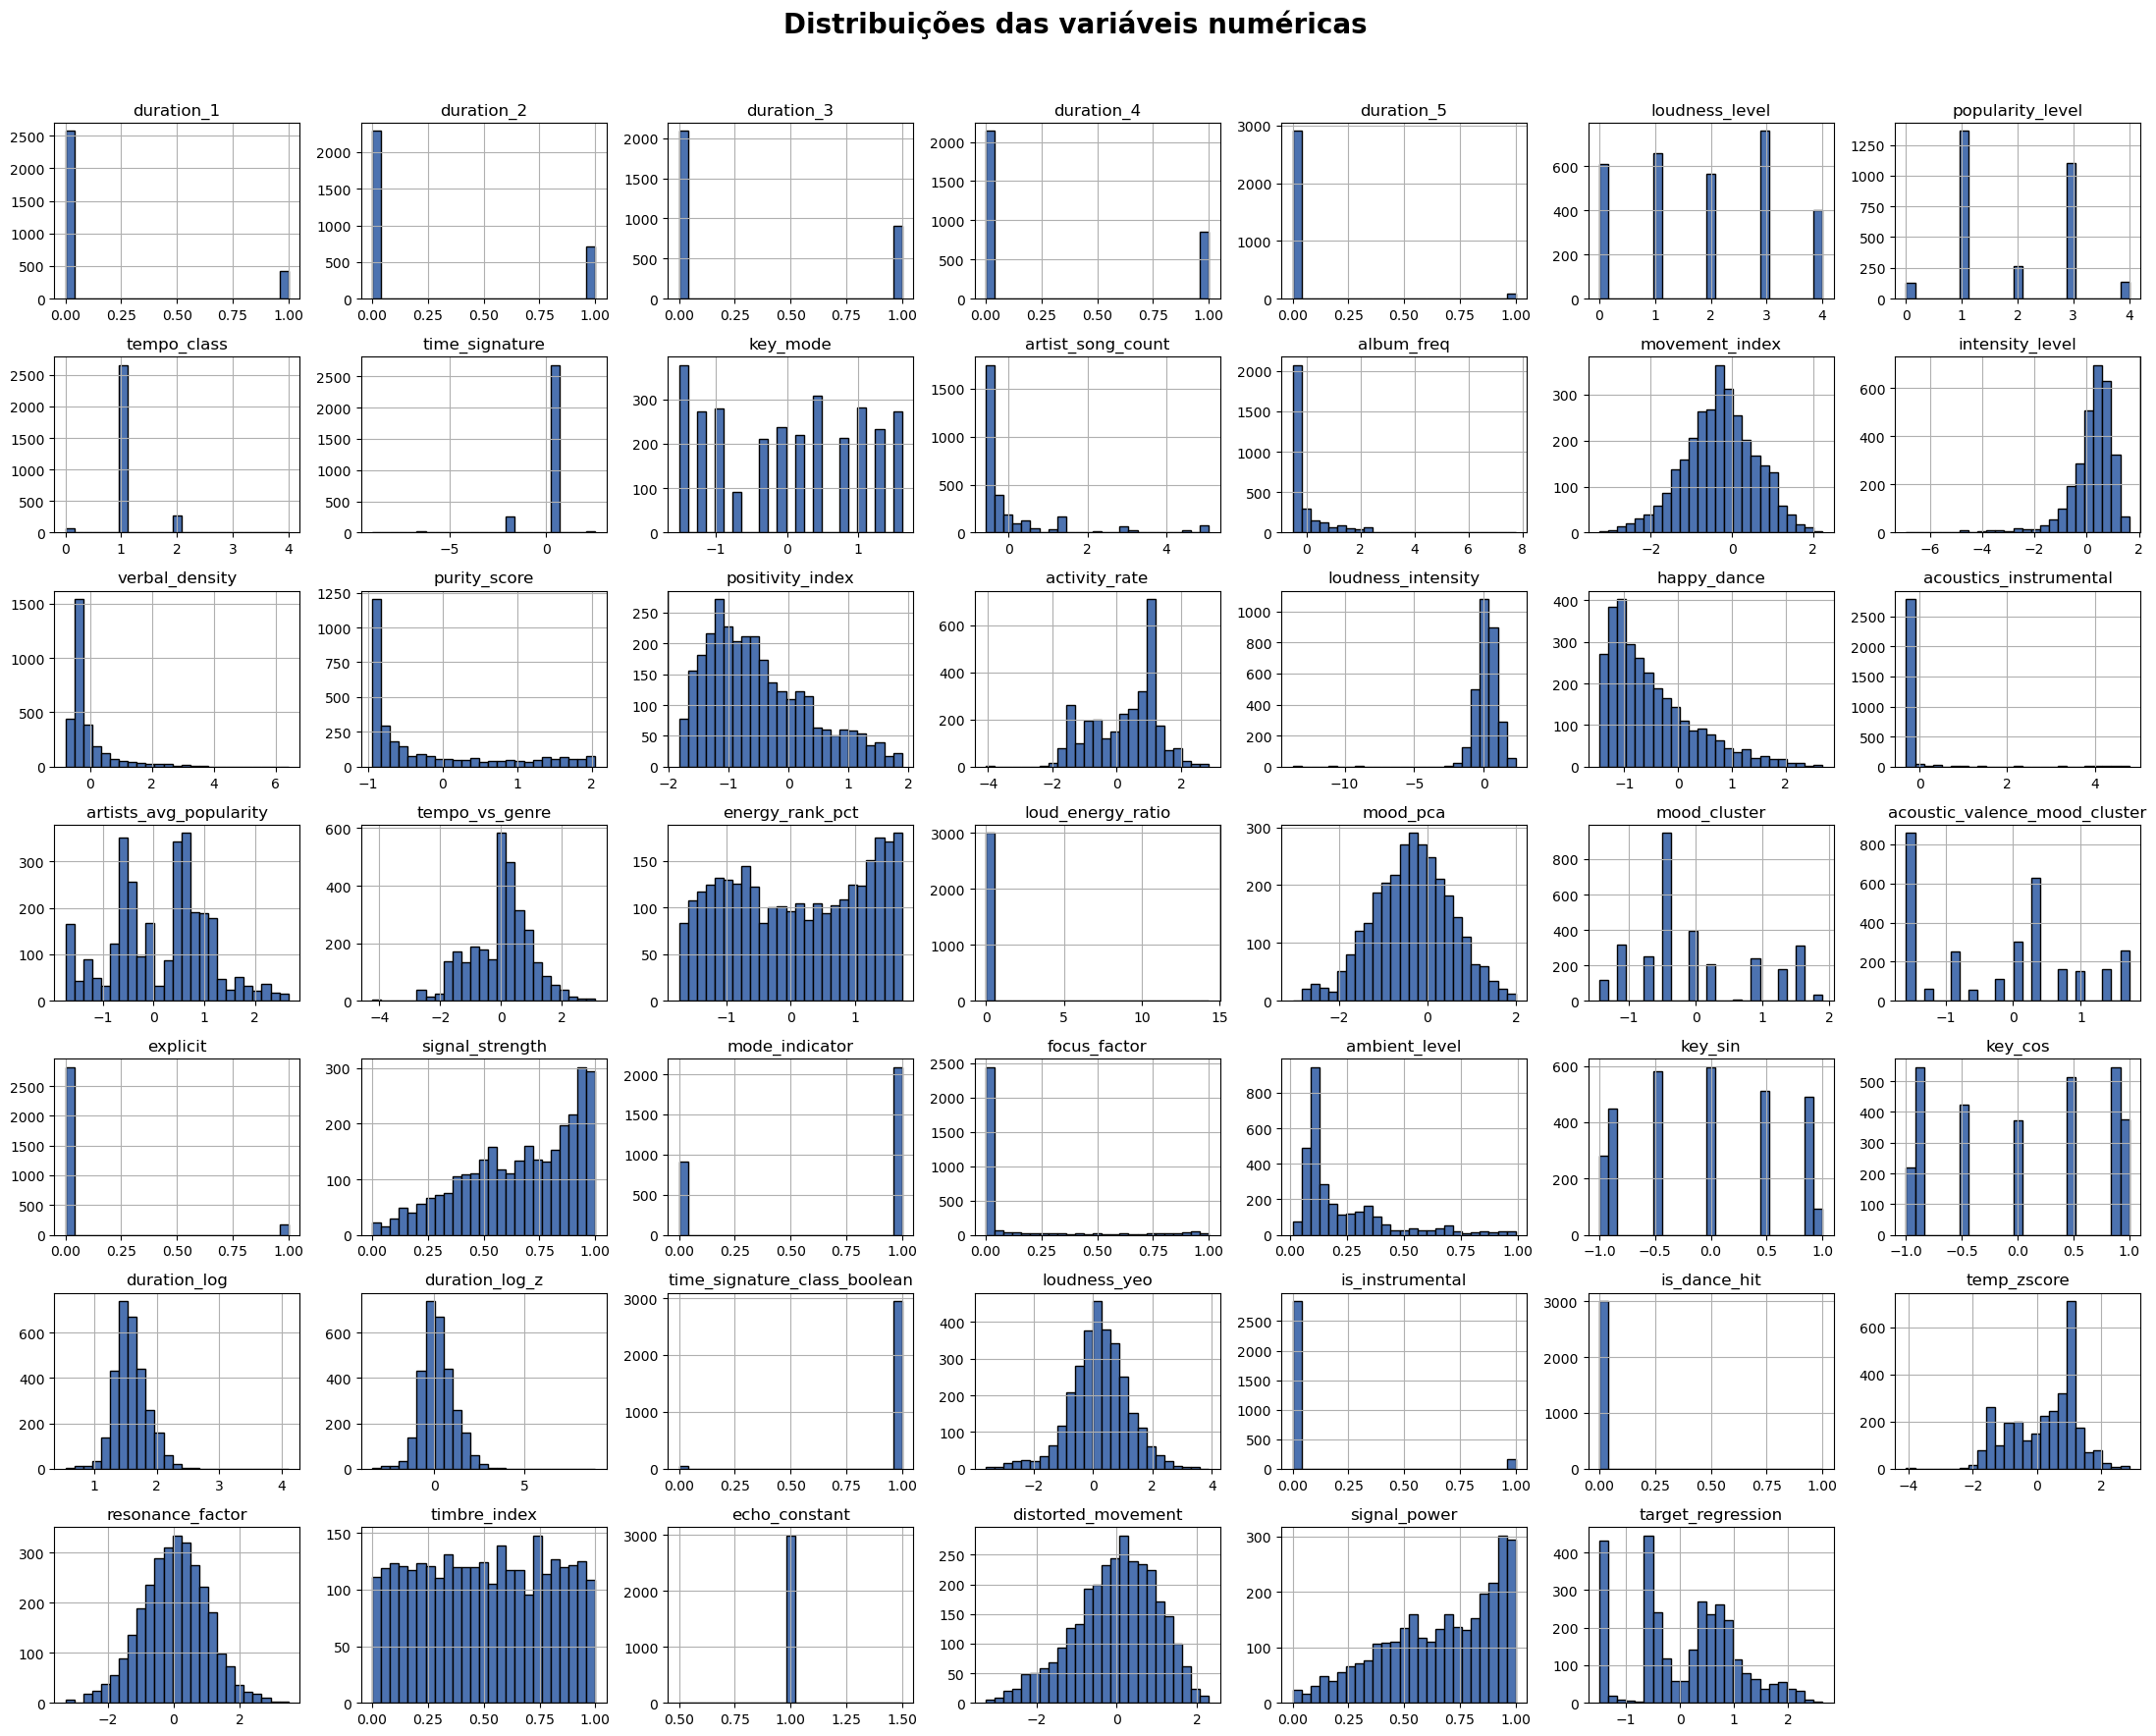

In [345]:
# ================================================================
# Exploratory Data Analysis (EDA) - #Univariate Analysis (Distribuições das variáveis numéricas)
# ================================================================

# Selecionar colunas numéricas
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Criar os histogramas num único grid
df[numeric_cols].hist(
    bins=25,                    # menos bins → curvas mais suaves
    figsize=(22, 18),           # figura grande e legível
    color='#4C72B0',            # azul consistente
    edgecolor='black'           # contorno para definição
)

plt.suptitle("Distribuições das variáveis numéricas", fontsize=20, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])  # garante que o título não sobrepõe
plt.show()


C:\Users\mjpac\AppData\Local\Temp\ipykernel_34580\2911522816.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=df[col].value_counts().index, ax=axes[i], palette='crest')


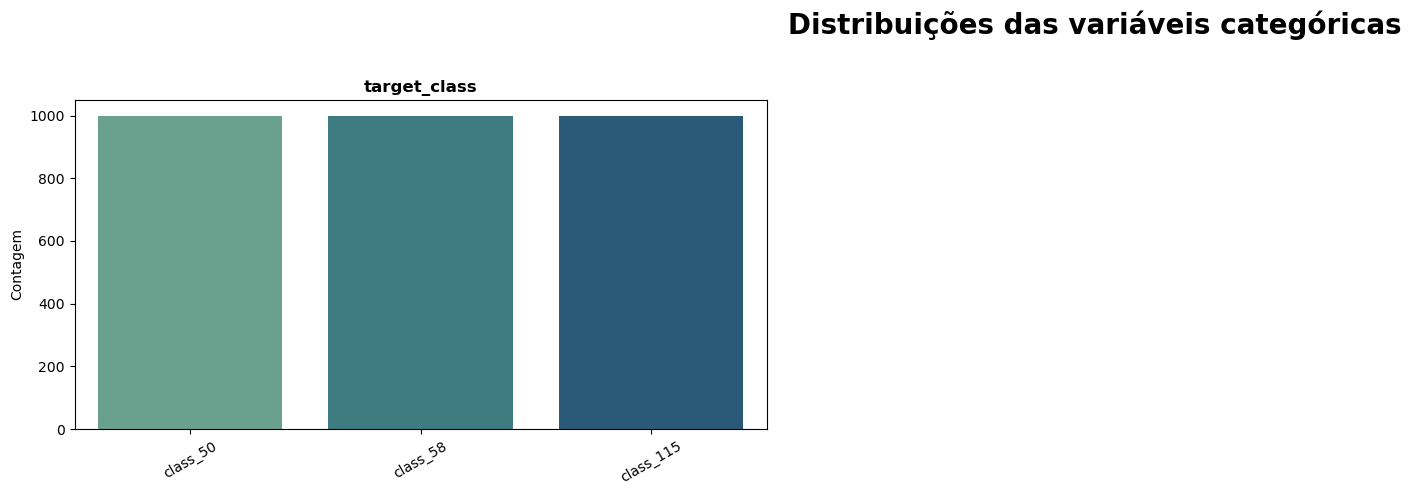

In [346]:
# ================================================================
# Exploratory Data Analysis (EDA) -
# Univariate Analysis (Distribuições das variáveis categóricas)
# ================================================================

# Selecionar colunas categóricas
cat_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()

# Criar figura com várias subplots automaticamente
n_cols = 3  # número de gráficos por linha
n_rows = int(np.ceil(len(cat_cols) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(22, n_rows * 5))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(x=df[col], order=df[col].value_counts().index, ax=axes[i], palette='crest')
    axes[i].set_title(col, fontsize=12, fontweight='bold')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Contagem')
    axes[i].tick_params(axis='x', rotation=30)

# Remover eixos vazios, se houver
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Distribuições das variáveis categóricas", fontsize=20, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()



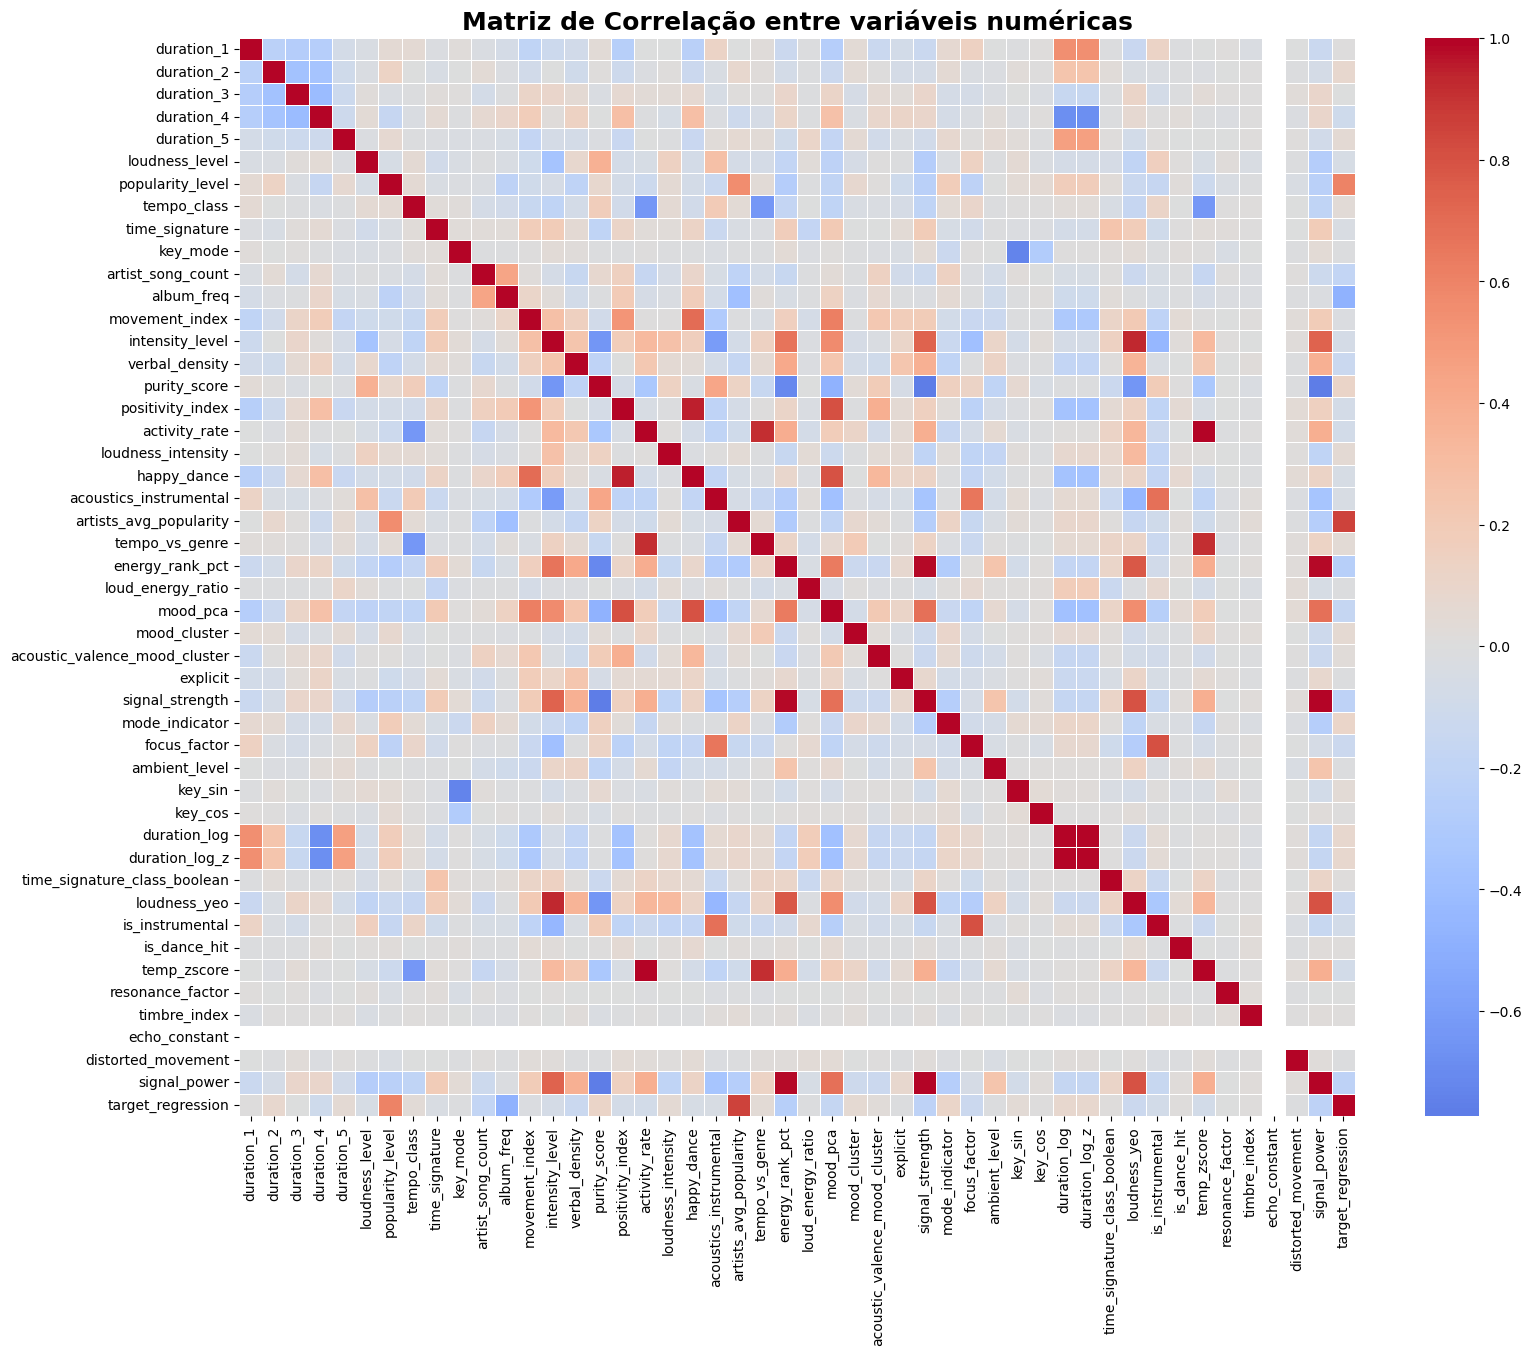

In [347]:
# ================================================================
# EDA - Bivariate Analysis
# Correlação entre features numéricas (Heatmap)
# ================================================================

# Matriz de correlação
corr_matrix = df.corr(numeric_only=True)

# Tamanho da figura
plt.figure(figsize=(18, 14))
sns.heatmap(
    corr_matrix,
    cmap='coolwarm',
    center=0,
    annot=False,    #True para ver os valores
    linewidths=0.5
)
plt.title("Matriz de Correlação entre variáveis numéricas", fontsize=18, fontweight='bold')
plt.show()


Top 6 features mais correlacionadas com target_regression:


artists_avg_popularity    0.851232
popularity_level          0.598682
album_freq                0.478200
energy_rank_pct           0.249096
signal_power              0.218484
signal_strength           0.218484
Name: target_regression, dtype: float64

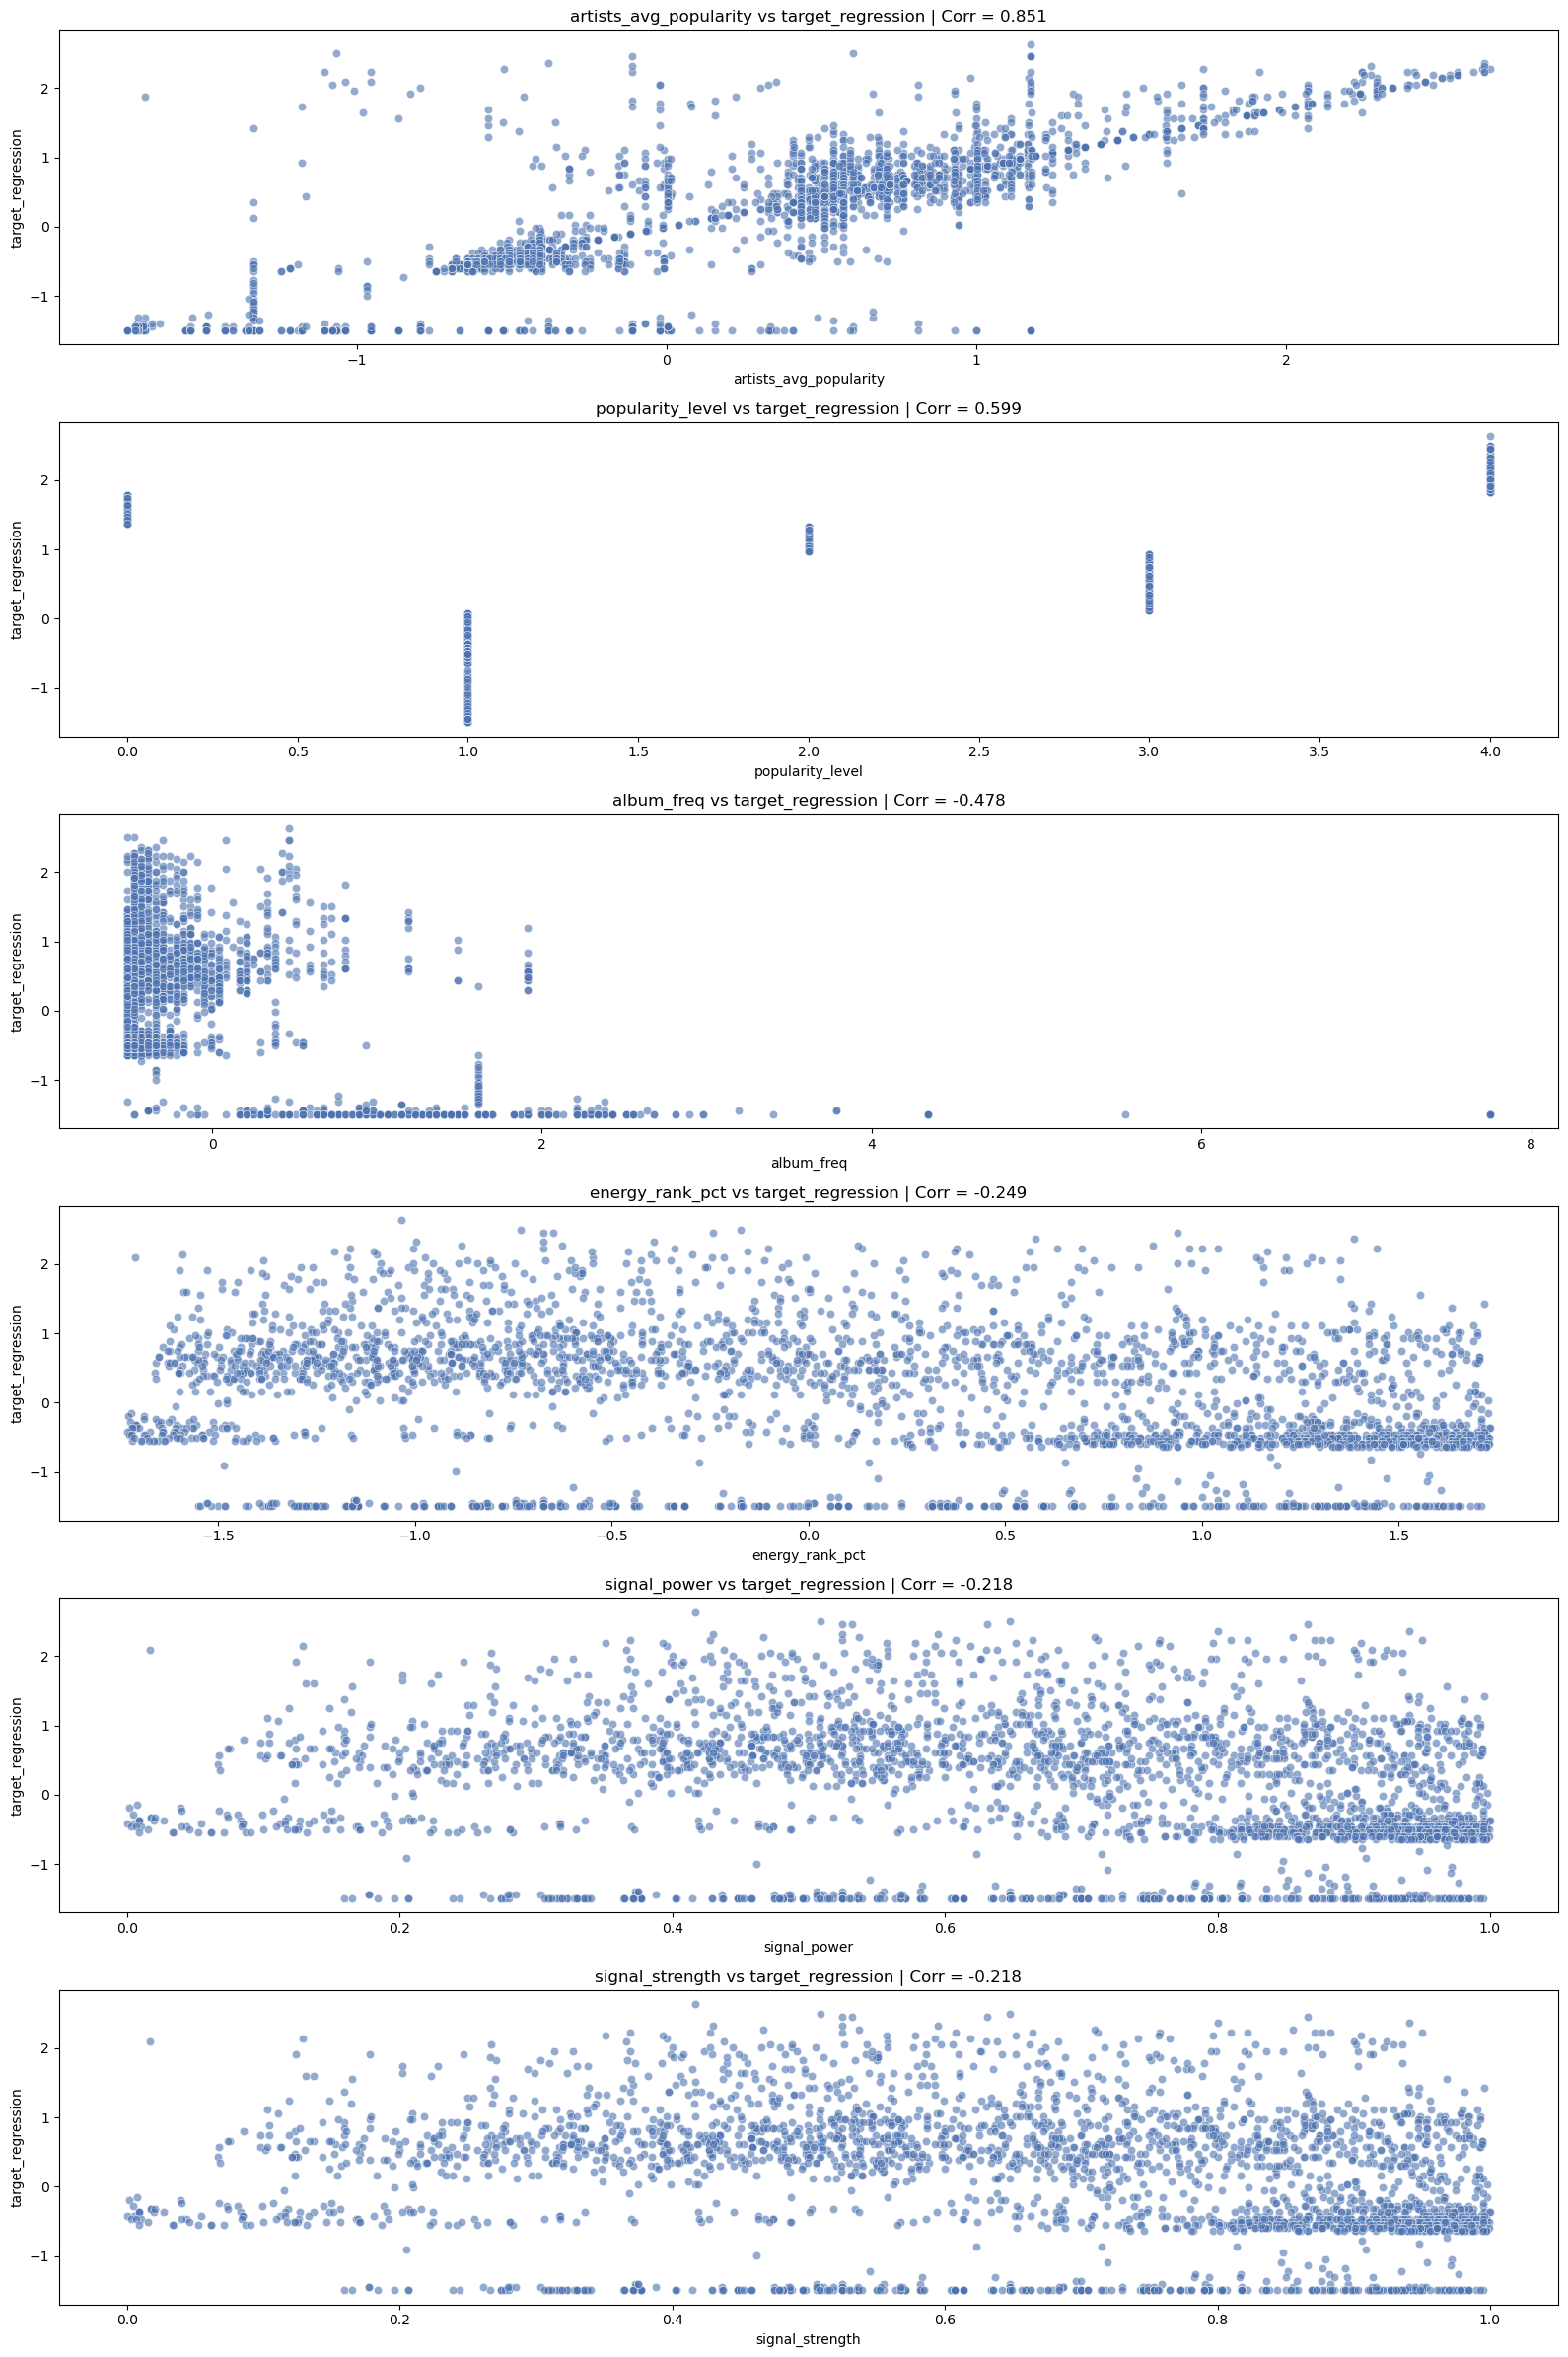

In [348]:
################################################################################
# Bivariate Analysis - Relação das features numéricas com TARGET_REGRESSION
################################################################################

TARGET_REG = "target_regression"
target_col = TARGET_REG

# Garantir que só pegamos colunas numéricas
cols_for_corr = numeric_cols.copy()
if target_col not in cols_for_corr:
    cols_for_corr.append(target_col)

# Calcular matriz de correlação
corr_matrix = df[cols_for_corr].corr()

# Obter correlação das features com o target_regression
corr_target_reg = corr_matrix[target_col].drop(target_col)  # remover o próprio target
corr_target_reg = pd.Series(corr_target_reg)

# Ordenar pelo valor absoluto (correlações mais fortes primeiro)
corr_target_reg_sorted = corr_target_reg.abs().sort_values(ascending=False)

# Definir quantas features mostrar
top_n = 6
top_features = corr_target_reg_sorted.head(top_n).index.tolist()

print(f"Top {top_n} features mais correlacionadas com {TARGET_REG}:")
display(corr_target_reg_sorted.head(top_n))

################################################################################
# Gráficos de dispersão entre as features mais correlacionadas e o target
################################################################################

plt.figure(figsize=(16, 4 * top_n))
for i, feat in enumerate(top_features):
    plt.subplot(top_n, 1, i + 1)
    sns.scatterplot(x=df[feat], y=df[target_col], alpha=0.6, color='#4C72B0')
    plt.xlabel(feat)
    plt.ylabel(target_col)
    plt.title(f"{feat} vs {target_col} | Corr = {corr_matrix.loc[feat, target_col]:.3f}")
plt.tight_layout()
plt.show()


Top 6 features mais correlacionadas com target_class:


movement_index      0.464022
happy_dance         0.435895
duration_log        0.408436
duration_log_z      0.408436
positivity_index    0.404902
mood_pca            0.363819
Name: target_class, dtype: float64

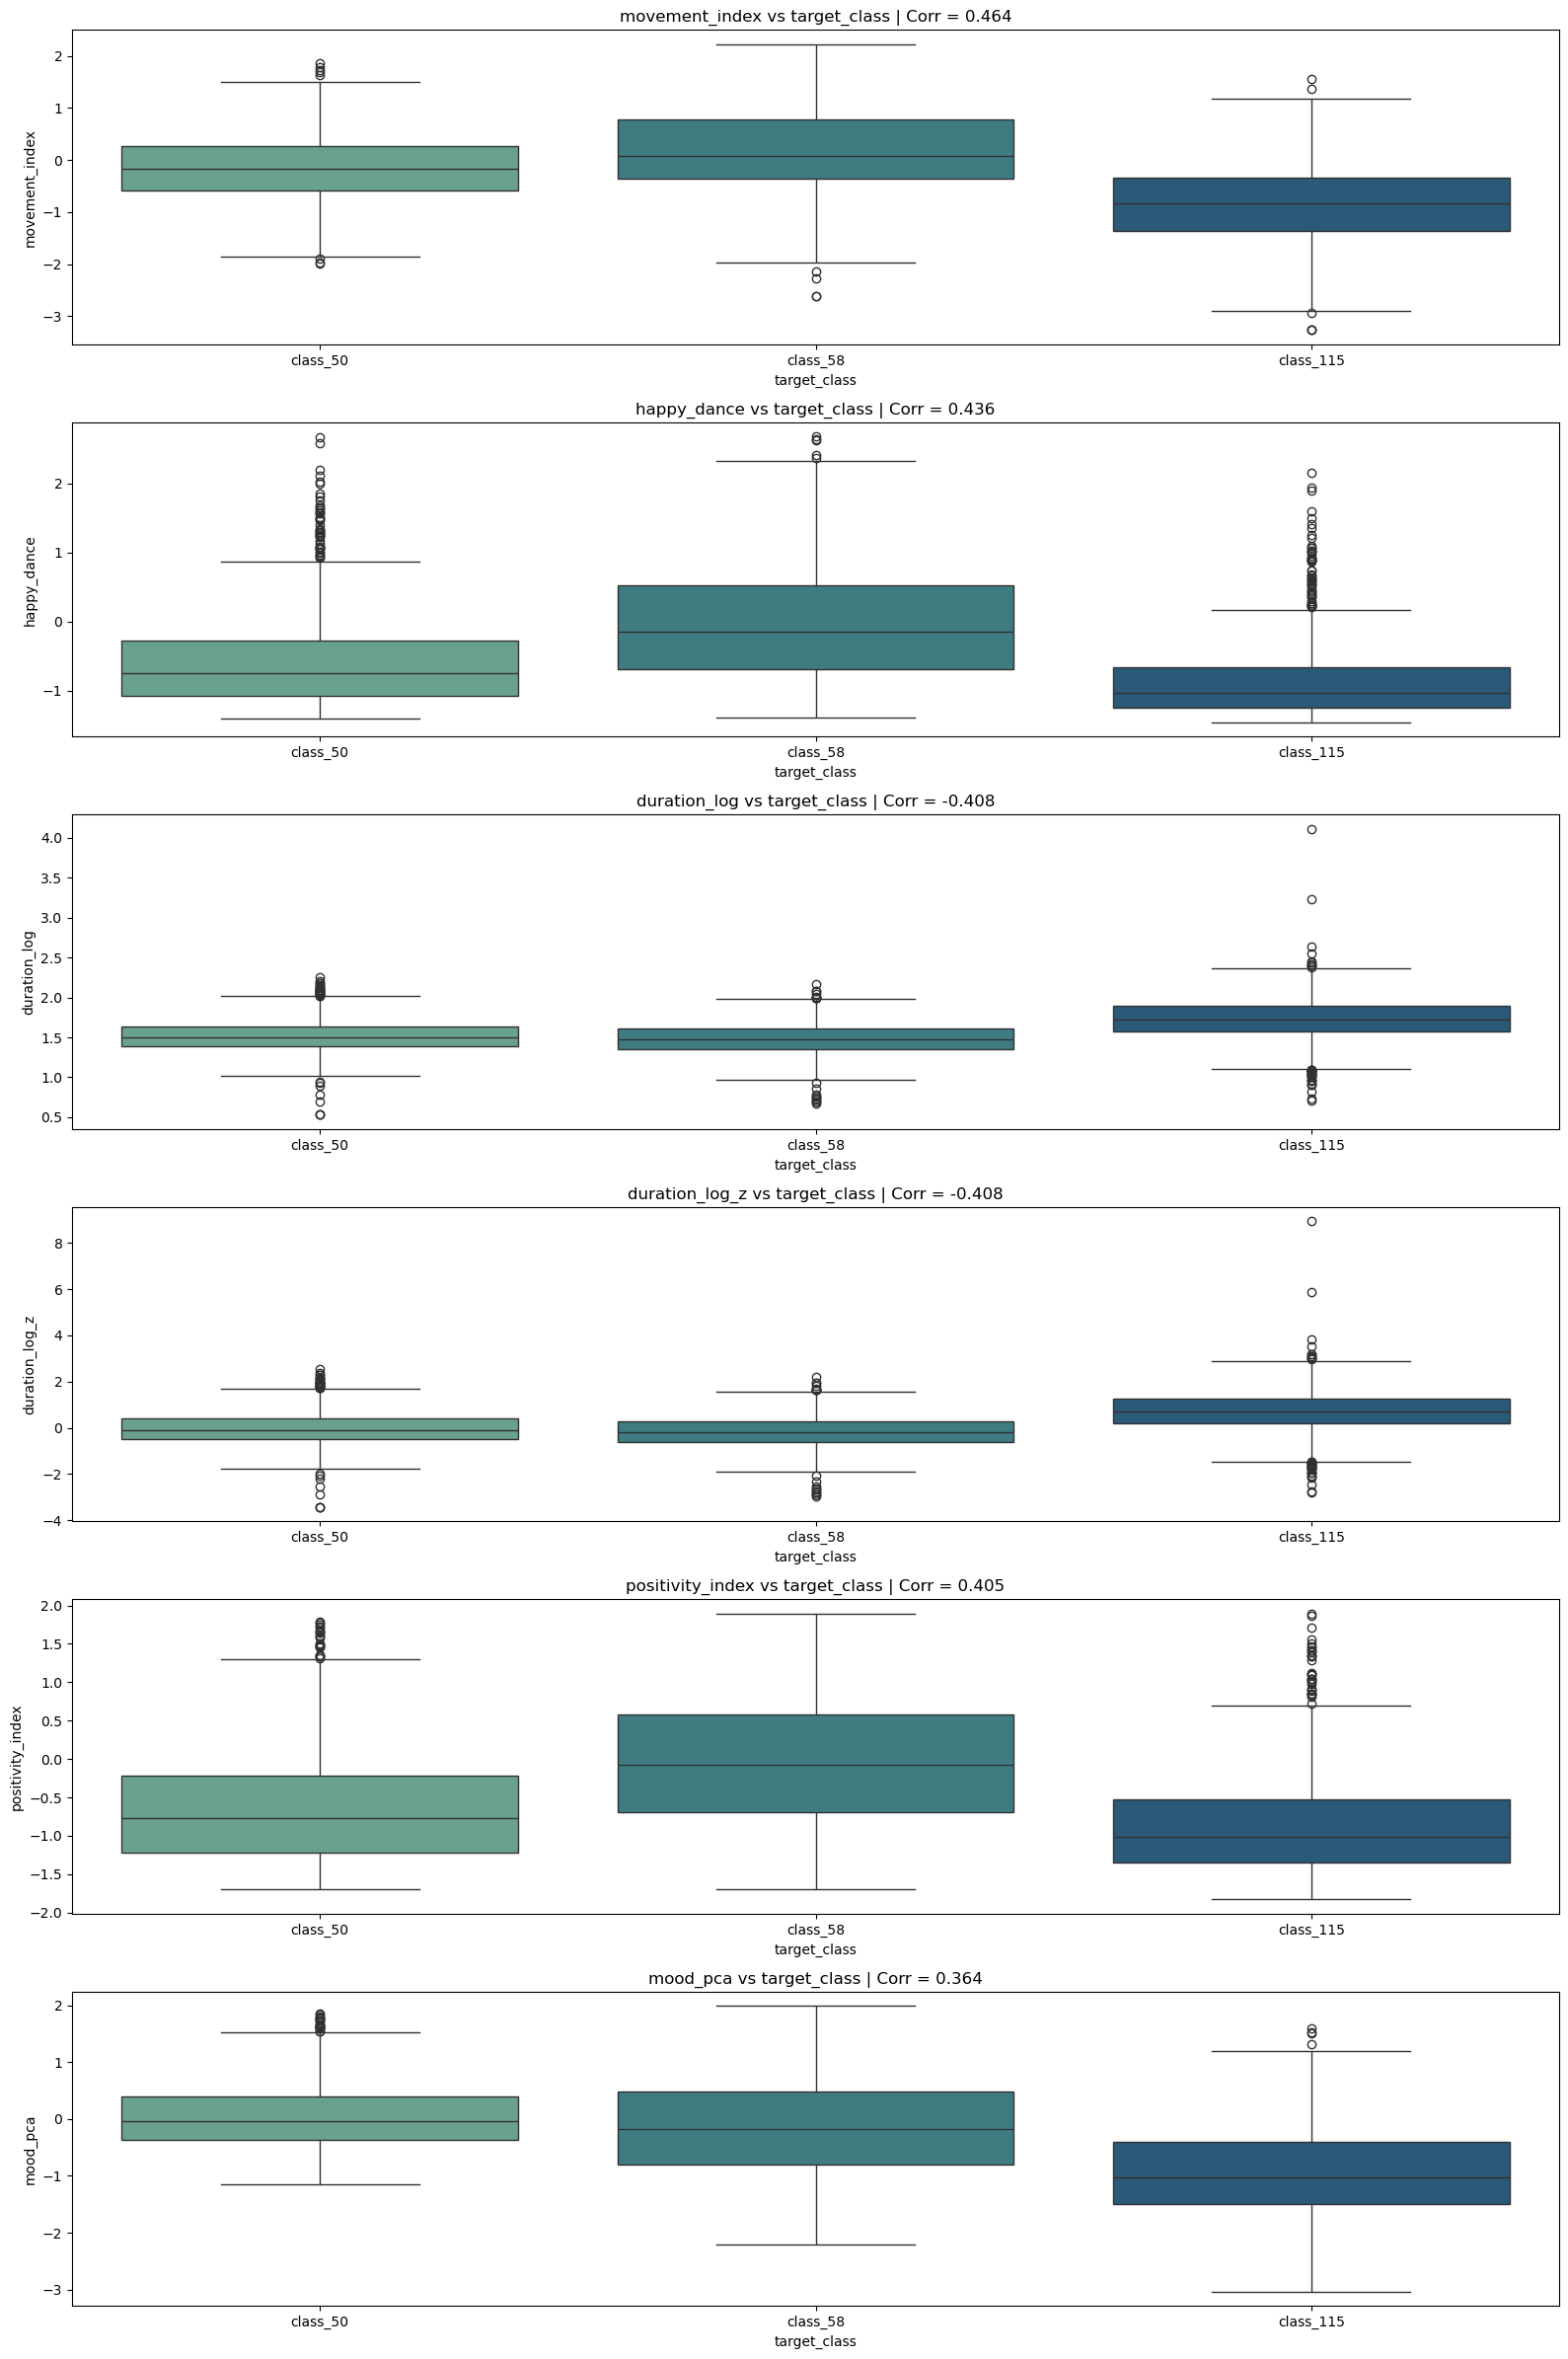

In [349]:
################################################################################
# Bivariate Analysis - Relação das features numéricas com TARGET_CLASS
################################################################################

TARGET_CLASS = "target_class"
target_col = TARGET_CLASS

# Garantir que só pegamos colunas numéricas
cols_for_corr = numeric_cols.copy()

# Copiar o dataframe e converter temporariamente as classes em valores numéricos
df_temp = df.copy()
df_temp[target_col] = df_temp[target_col].astype("category").cat.codes  # converte classes para 0, 1, 2, ...

# Calcular matriz de correlação
corr_matrix_class = df_temp[cols_for_corr + [target_col]].corr()

# Obter correlação das features com o target_class
corr_target_class = corr_matrix_class[target_col].drop(target_col)  # remover o próprio target
corr_target_class = pd.Series(corr_target_class)

# Ordenar pelo valor absoluto (correlações mais fortes primeiro)
corr_target_class_sorted = corr_target_class.abs().sort_values(ascending=False)

# Definir quantas features mostrar
top_n = 6
top_features_class = corr_target_class_sorted.head(top_n).index.tolist()

print(f"Top {top_n} features mais correlacionadas com {TARGET_CLASS}:")
display(corr_target_class_sorted.head(top_n))

################################################################################
# Gráficos de distribuição (boxplots) das top features por classe
################################################################################

plt.figure(figsize=(16, 4 * top_n))
for i, feat in enumerate(top_features_class):
    plt.subplot(top_n, 1, i + 1)
    sns.boxplot(x=df[target_col], y=df[feat], hue=df[target_col], palette="crest", legend=False)
    plt.xlabel(target_col)
    plt.ylabel(feat)
    plt.title(f"{feat} vs {target_col} | Corr = {corr_matrix_class.loc[feat, target_col]:.3f}")
plt.tight_layout()
plt.show()



A análise Univariada mostrou que a maioria das variáveis numéricas apresenta distribuições assimétricas e escalas distintas, sendo recomendável aplicar normalização antes da modelação.
Observou-se também que artists_avg_popularity e popularity_level se destacam como potenciais preditores, enquanto a variável target_class apresenta algum desbalanceamento entre classes.

Na Bivariada, verificaram-se fortes correlações positivas entre artists_avg_popularity e popularity_level com o target_regression, sugerindo influência direta na popularidade contínua.
Os boxplots mostraram diferenças claras entre classes para algumas features, indicando bom poder discriminativo para tarefas de classificação.

In [350]:
################################################################################
# 3. Preparação de Features e Variáveis target
################################################################################

TARGET_REG = 'target_regression'
TARGET_CLASS = 'target_class'

# --- Codificar target_class se for categórica ---
y_class = df[TARGET_CLASS].astype('category')
y_class_codes = y_class.cat.codes
class_labels = y_class.cat.categories.tolist()

# --- Features: remover colunas de target ---
X = df.drop(columns=[TARGET_REG, TARGET_CLASS]).copy() #copy, evita erros silenciosos
y_reg = df[TARGET_REG]

# --- Tratar valores em falta (usar mediana) ---
X = X.fillna(X.median(numeric_only=True))

print(f"Features numéricas selecionadas: {X.shape[1]}")
print(f"Dimensões de X: {X.shape}, y_reg: {y_reg.shape}, y_class: {y_class.shape}")


Features numéricas selecionadas: 47
Dimensões de X: (2999, 47), y_reg: (2999,), y_class: (2999,)


In [351]:
# ================================================================
# 4. Split Treino/Teste e Normalização para Regressão
# ================================================================

# Definir X e y para regressão
X_reg = X.copy()
y_reg = df[TARGET_REG]

# Hold-out split para regressão
X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

print(f"Train shapes → X: {X_train.shape}, y: {y_train.shape}")
print(f"Test shapes  → X: {X_test.shape}, y: {y_test.shape}")

# normalização
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

print("\nMédias e desvios padrão após normalização:")
print(f"Média treino: {X_train_s.mean():.4f},  Desvio treino: {X_train_s.std():.4f}")
print(f"Média teste:  {X_test_s.mean():.4f},  Desvio teste:  {X_test_s.std():.4f}")

#Converter de volta para DataFrame
X_train_s = pd.DataFrame(X_train_s, columns=X_train.columns)
X_test_s = pd.DataFrame(X_test_s, columns=X_test.columns)

# Definir as colunas numéricas (features a testar na regressão)
num_features = X_train.columns.tolist()
print(f"Número de features numéricas: {len(num_features)}")


Train shapes → X: (2099, 47), y: (2099,)
Test shapes  → X: (900, 47), y: (900,)

Médias e desvios padrão após normalização:
Média treino: -0.0000,  Desvio treino: 0.9893
Média teste:  -0.0030,  Desvio teste:  0.9477
Número de features numéricas: 47


In [352]:
################################################################################
# Simple Linear Regression (Hold-out) – todas as features
################################################################################

best_feat = None
best_r2 = -np.inf #garante que qualquer R² calculado será maior
simple_results = []

for feat in num_features:
    lr = LinearRegression()
    lr.fit(X_train_s[[feat]], y_train)
    y_pred = lr.predict(X_test_s[[feat]])
    
    # Métricas
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    
    simple_results.append((feat, r2, rmse, mae))
    
    if r2 > best_r2:
        best_r2 = r2
        best_feat = feat

# Mostrar ranking
results_df = pd.DataFrame(simple_results, columns=['Feature', 'r2', 'RMSE', 'MAE']).sort_values('r2', ascending=False).reset_index(drop=True)
display(results_df.head(10))

print(f"\nMelhor feature (modelo simples): {best_feat} | r2 = {best_r2:.3f}")

# Modelo final com a melhor feature
lr_best = LinearRegression()
lr_best.fit(X_train_s[[best_feat]], y_train)
y_pred_best = lr_best.predict(X_test_s[[best_feat]])

# Métricas do modelo final
mse_best = mean_squared_error(y_test, y_pred_best)
metrics_simple = {
    'r2': r2_score(y_test, y_pred_best),
    'RMSE': np.sqrt(mse_best),
    'MAE': mean_absolute_error(y_test, y_pred_best)
}
print("\nDesempenho do melhor modelo simples:")
for k, v in metrics_simple.items():
    print(f"{k}: {v:.4f}")


,Feature,r2,RMSE,MAE
0,artists_avg_popularity,0.702619,0.518091,0.265195
1,popularity_level,0.391428,0.741150,0.498189
2,album_freq,0.214592,0.841972,0.701489
3,energy_rank_pct,0.059739,0.921243,0.721888
4,signal_strength,0.047091,0.927418,0.742323
5,signal_power,0.047091,0.927418,0.742323
6,artist_song_count,0.033244,0.934132,0.793878
7,mood_pca,0.029121,0.936122,0.767708
8,verbal_density,0.026780,0.937250,0.766090
9,loudness_yeo,0.019156,0.940914,0.777029



Melhor feature (modelo simples): artists_avg_popularity | r2 = 0.703

Desempenho do melhor modelo simples:
r2: 0.7026
RMSE: 0.5181
MAE: 0.2652


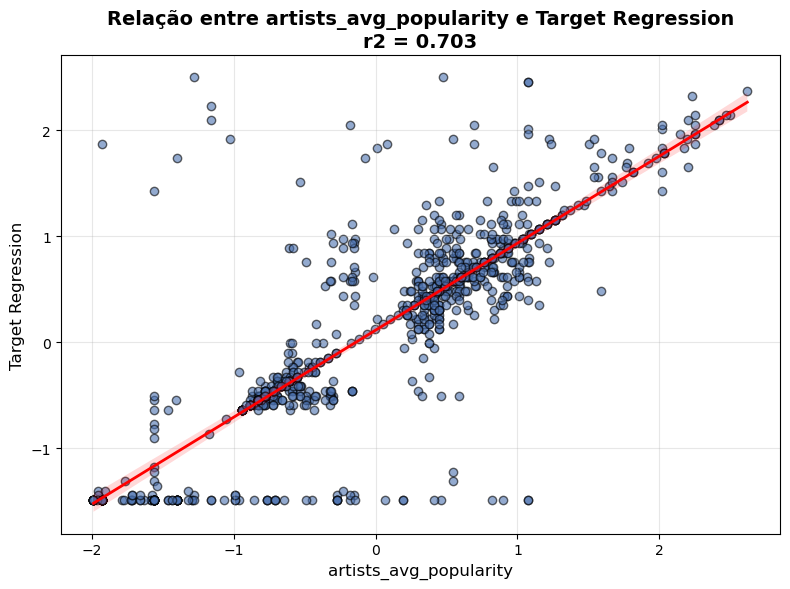

In [353]:
################################################################################
# Gráfic: Relação entre o melhor preditor e o target_regression
################################################################################

plt.figure(figsize=(8,6))
sns.regplot(
    x=X_test_s[best_feat],
    y=y_test,
    scatter_kws={'alpha':0.6, 'color':'#4C72B0', 'edgecolor':'black'},
    line_kws={'color':'red', 'lw':2}
)
plt.xlabel(best_feat, fontsize=12)
plt.ylabel("Target Regression", fontsize=12)
plt.title(f"Relação entre {best_feat} e Target Regression\nr2 = {metrics_simple['r2']:.3f}", fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

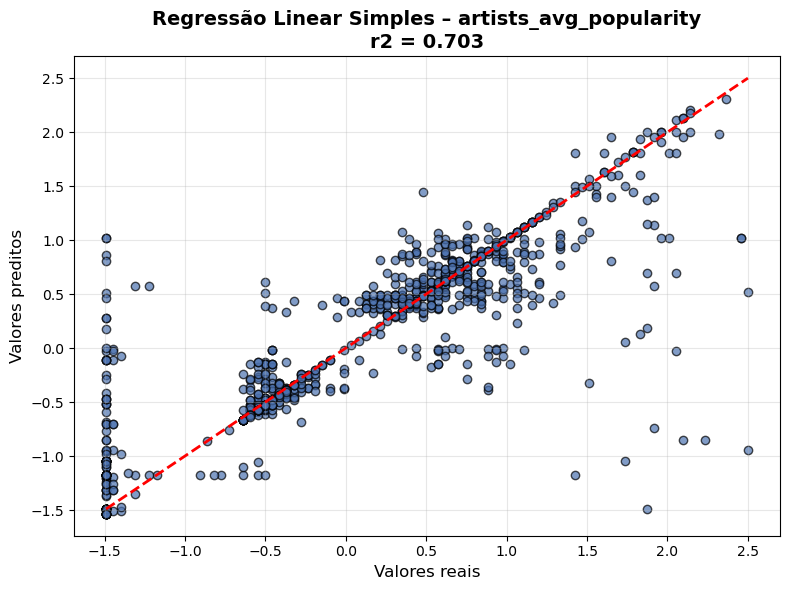

In [354]:
################################################################################
# Gráfico de dispersão: valores reais vs preditos (modelo simples)
################################################################################

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_best, alpha=0.7, color="#4C72B0", edgecolor='black')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Valores reais", fontsize=12)
plt.ylabel("Valores preditos", fontsize=12)
plt.title(f"Regressão Linear Simples – {best_feat}\nr2 = {metrics_simple['r2']:.3f}", fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()




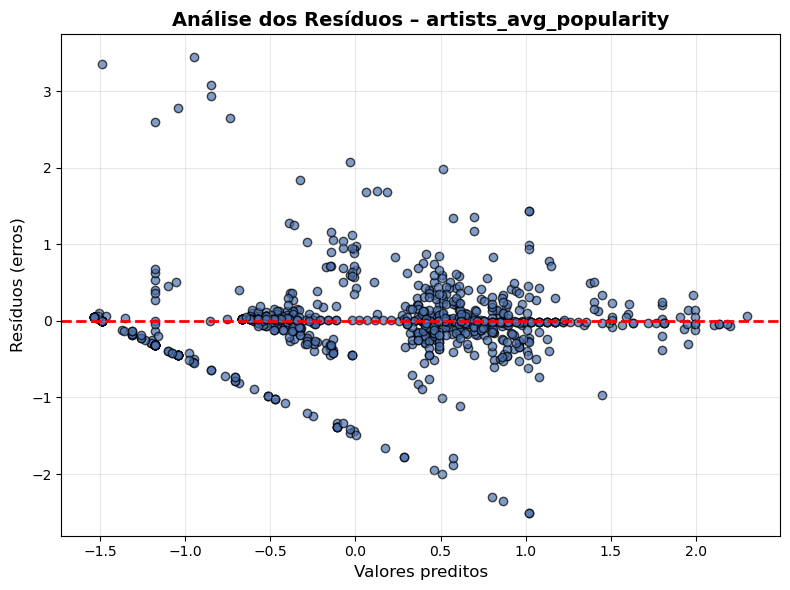

In [355]:
################################################################################
# Gráfico de resíduos vs valores preditos
################################################################################

residuos = y_test - y_pred_best

plt.figure(figsize=(8,6))
plt.scatter(y_pred_best, residuos, alpha=0.7, color="#4C72B0", edgecolor='black')
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel("Valores preditos", fontsize=12)
plt.ylabel("Resíduos (erros)", fontsize=12)
plt.title(f"Análise dos Resíduos – {best_feat}", fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

A Regressão Linear Simples foi aplicada individualmente a todas as variáveis numéricas do conjunto de dados, com o objetivo de identificar o melhor preditor do target_regression.
O melhor desempenho foi obtido com a variável artists_avg_popularity, que apresentou R2 = 0,703, RMSE = 0,518 e MAE = 0,265, demonstrando uma forte relação linear positiva com o alvo.
O gráfico de dispersão entre artists_avg_popularity e o target_regression confirma visualmente esta relação linear crescente, reforçando o seu poder explicativo.
No gráfico de valores reais vs preditos, observa-se que as previsões do modelo estão próximas dos valores reais, evidenciando um bom ajuste global.
Por fim, a análise dos resíduos vs valores preditos mostra uma distribuição aleatória em torno de zero, sem padrões visíveis, o que confirma a adequação do modelo linear simples e a ausência de viés sistemático.
Embora existam alguns valores atípicos pontuais e uma ligeira variação na dispersão, estes não comprometem a qualidade global do modelo, que se revela sólido e representativo.

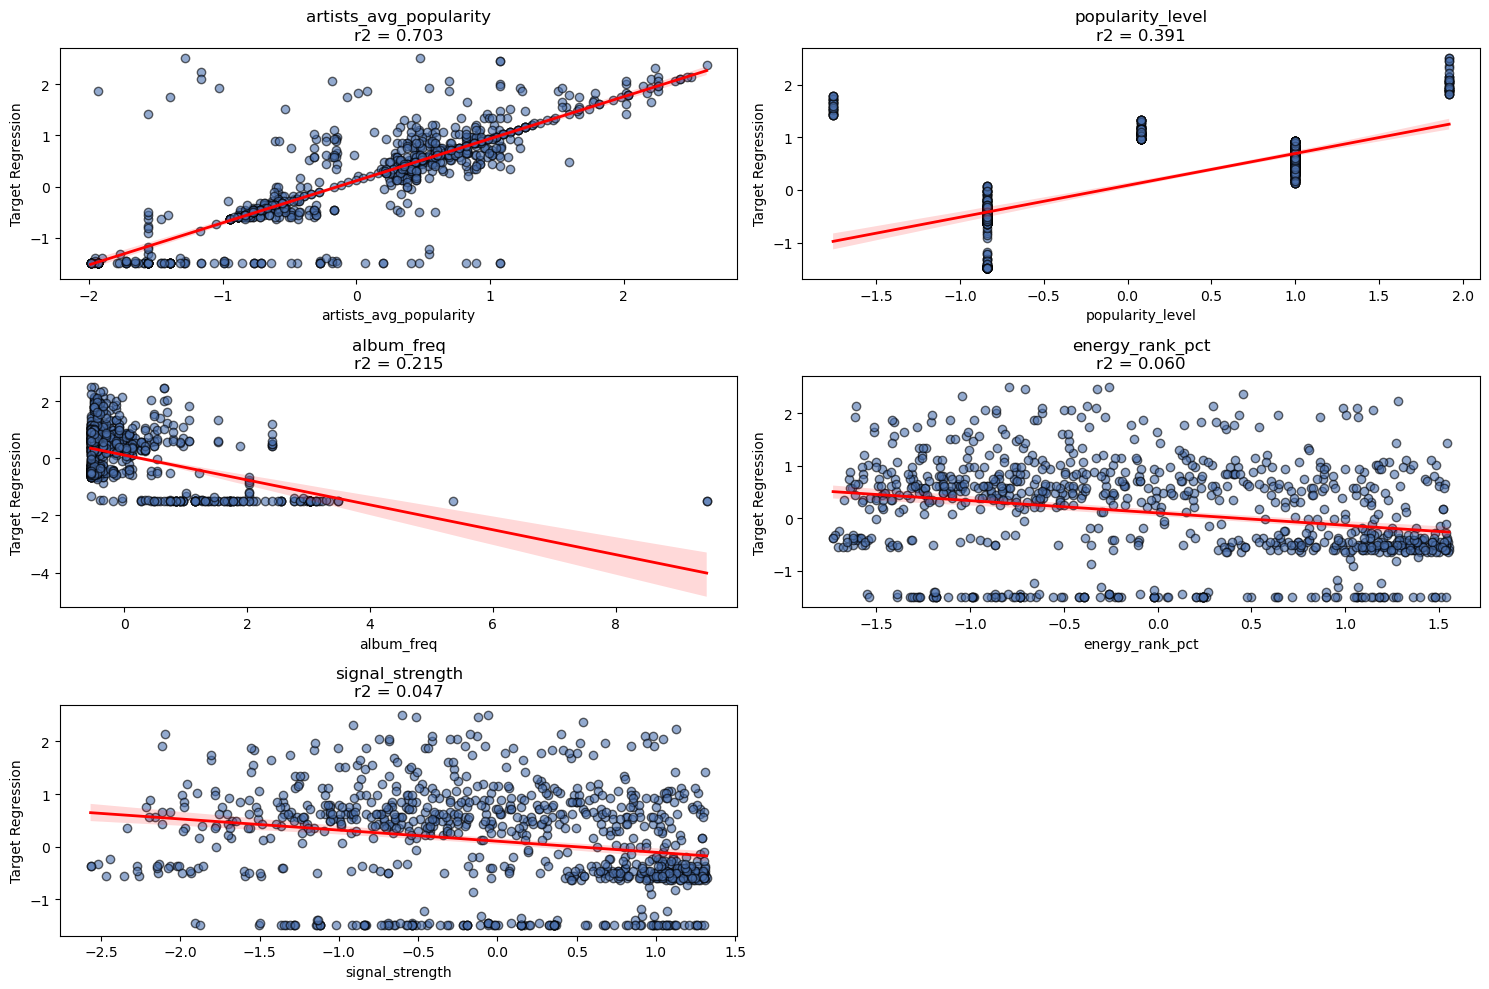

In [356]:
################################################################################
# Regressão Linear Simples – Teste das 5 melhores variáveis
################################################################################

top5_feats = results_df['Feature'].head(5).tolist()

plt.figure(figsize=(15, 10))

for i, feat in enumerate(top5_feats, 1):
    plt.subplot(3, 2, i)
    sns.regplot(
        x=X_test_s[feat],
        y=y_test,
        scatter_kws={'alpha':0.6, 'color':'#4C72B0', 'edgecolor':'black'},
        line_kws={'color':'red', 'lw':2}
    )
    plt.title(f"{feat}\nr2 = {results_df.loc[results_df['Feature']==feat, 'r2'].values[0]:.3f}")
    plt.xlabel(feat)
    plt.ylabel("Target Regression")

plt.tight_layout()
plt.show()


Equação da Regressão Linear Simples:
target_regression = 0.120 + 0.833 × artists_avg_popularity


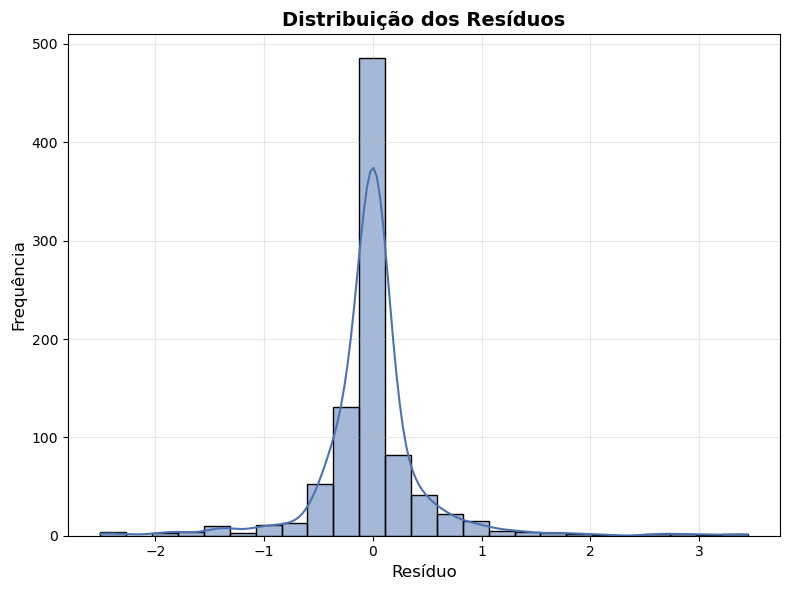

In [357]:
################################################################################
# Análises complementares – Regressão Linear Simples
################################################################################

# Mostrar a equação do modelo
coef = lr_best.coef_[0]
intercept = lr_best.intercept_
print(f"Equação da Regressão Linear Simples:")
print(f"target_regression = {intercept:.3f} + {coef:.3f} × {best_feat}")

# Distribuição dos resíduos
plt.figure(figsize=(8,6))
sns.histplot(y_test - y_pred_best, bins=25, kde=True, color="#4C72B0", edgecolor='black')
plt.title("Distribuição dos Resíduos", fontsize=14, fontweight='bold')
plt.xlabel("Resíduo", fontsize=12)
plt.ylabel("Frequência", fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()



Desempenho – Regressão Linear Múltipla (todas as features):
r2   = 0.765
RMSE = 0.460
MAE  = 0.280

Comparação entre os modelos:


,Modelo,r2,RMSE,MAE
0,Linear Simples,0.702619,0.518091,0.265195
1,Linear Múltipla,0.765428,0.460138,0.280492


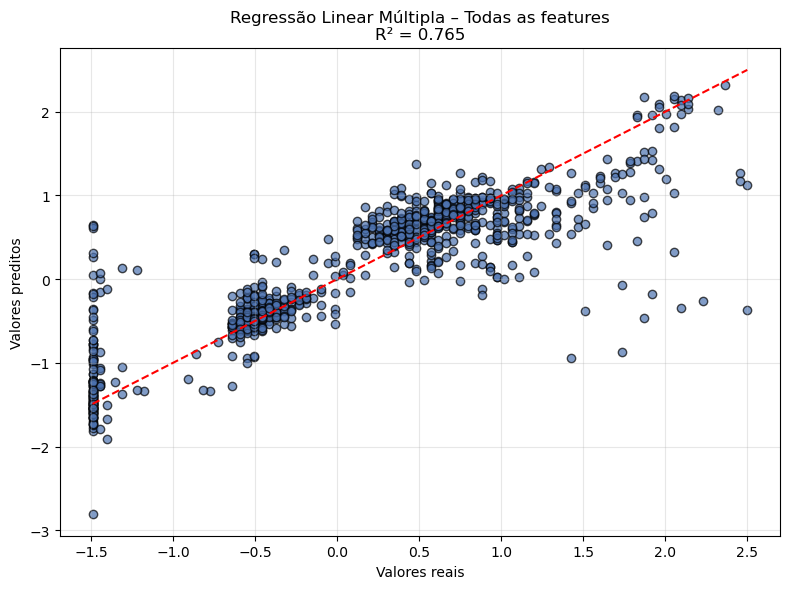

In [358]:
################################################################################
# Regressão Linear Múltipla (todas as features) + Comparação com a Simples
################################################################################

# Treinar modelo com todas as features numéricas
lr_multi = LinearRegression()
lr_multi.fit(X_train_s, y_train)
y_pred_multi = lr_multi.predict(X_test_s)

# Calcular métricas
r2_multi = r2_score(y_test, y_pred_multi)
mse_multi = mean_squared_error(y_test, y_pred_multi)
rmse_multi = np.sqrt(mse_multi)
mae_multi = mean_absolute_error(y_test, y_pred_multi)

print("Desempenho – Regressão Linear Múltipla (todas as features):")
print(f"r2   = {r2_multi:.3f}")
print(f"RMSE = {rmse_multi:.3f}")
print(f"MAE  = {mae_multi:.3f}")

# Comparação com a regressão simples ### FALTA GRAFICO
comparison = pd.DataFrame({
    'Modelo': ['Linear Simples', 'Linear Múltipla'],
    'r2': [metrics_simple['r2'], r2_multi],
    'RMSE': [metrics_simple['RMSE'], rmse_multi],
    'MAE': [metrics_simple['MAE'], mae_multi]
})

print("\nComparação entre os modelos:")
display(comparison)

# Gráfico de dispersão – múltipla
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_multi, alpha=0.7, color="#4C72B0", edgecolor="black")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Valores reais")
plt.ylabel("Valores preditos")
plt.title(f"Regressão Linear Múltipla – Todas as features\nR² = {r2_multi:.3f}")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


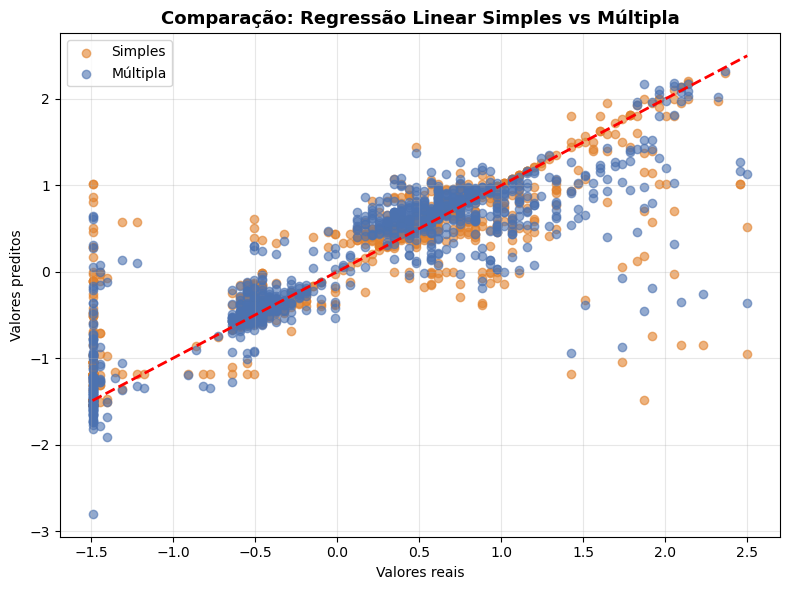

In [359]:
################################################################################
# Gráfico comparativo – Regressão Linear Simples vs Múltipla
################################################################################

# Previsões do modelo simples (melhor variável)
y_pred_simple = y_pred_best  # já calculado no modelo simples

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_simple, color="#E1812C", alpha=0.6, label="Simples")
plt.scatter(y_test, y_pred_multi, color="#4C72B0", alpha=0.6, label="Múltipla")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

plt.xlabel("Valores reais")
plt.ylabel("Valores preditos")
plt.title("Comparação: Regressão Linear Simples vs Múltipla", fontsize=13, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [360]:
################################################################################
# Selecionar as N melhores features para Regressão Linear Múltipla
################################################################################

# Definir o número de features a selecionar
N = 5

# Selecionar as N variáveis com maior R² da Regressão Linear Simples
top_features = results_df['Feature'].head(N).tolist()

print(f"Top {N} features selecionadas para Regressão Linear Múltipla:")
print(top_features)


Top 5 features selecionadas para Regressão Linear Múltipla:
['artists_avg_popularity', 'popularity_level', 'album_freq', 'energy_rank_pct', 'signal_strength']


R² = 0.763
RMSE = 0.463
MAE = 0.280


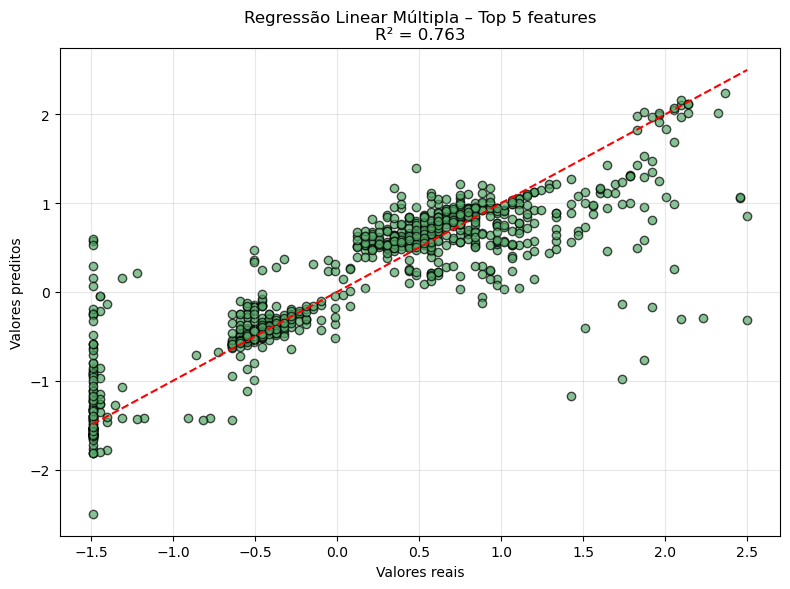

In [361]:
################################################################################
# Regressão Linear Múltipla (Hold-out) – Modelo com Top 5 features
################################################################################

# Treinar modelo com as features selecionadas
lr_multi_top = LinearRegression()
lr_multi_top.fit(X_train_s[top_features], y_train)
y_pred_multi_top = lr_multi_top.predict(X_test_s[top_features])

# Calcular métricas
r2 = r2_score(y_test, y_pred_multi_top)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_multi_top))
mae = mean_absolute_error(y_test, y_pred_multi_top)

print(f"R² = {r2:.3f}")
print(f"RMSE = {rmse:.3f}")
print(f"MAE = {mae:.3f}")

# Gráfico valores reais vs preditos
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_multi_top, alpha=0.7, color="#55A868", edgecolor="black")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.xlabel("Valores reais")
plt.ylabel("Valores preditos")
plt.title(f"Regressão Linear Múltipla – Top {len(top_features)} features\nR² = {r2:.3f}")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [362]:
################################################################################
# Comparação – Linear Simples vs Linear Múltipla (Top 5 features)
################################################################################

comparison_top5 = pd.DataFrame({
    'Modelo': ['Linear Simples', 'Linear Múltipla (Top 5)'],
    'r2': [metrics_simple['r2'], r2],
    'RMSE': [metrics_simple['RMSE'], rmse],
    'MAE': [metrics_simple['MAE'], mae]
})

print("\nComparação entre os modelos (Simples vs Múltipla – Top 5):")
display(comparison_top5)



Comparação entre os modelos (Simples vs Múltipla – Top 5):


,Modelo,r2,RMSE,MAE
0,Linear Simples,0.702619,0.518091,0.265195
1,Linear Múltipla (Top 5),0.762942,0.462570,0.279597


In [ ]:
################################################################################
# Regressão Linear Múltipla – Teste com 2, 3, 4 e 5 melhores variáveis
################################################################################

results_multi_n = []

for n in range(2, 6):
    feats = results_df['Feature'].head(n).tolist()
    lr = LinearRegression()
    lr.fit(X_train_s[feats], y_train)
    y_pred = lr.predict(X_test_s[feats])
    
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    
    results_multi_n.append((n, r2, rmse, mae))

multi_n_df = pd.DataFrame(results_multi_n, columns=['Nº de variáveis', 'r2', 'RMSE', 'MAE'])
display(multi_n_df)


,Nº de variáveis,r2,RMSE,MAE
0,2,0.731882,0.491941,0.294669
1,3,0.763040,0.462475,0.277824
2,4,0.763036,0.462478,0.278011
3,5,0.762942,0.462570,0.279597


A análise permitiu concluir que a Regressão Linear Múltipla apresentou um desempenho superior ao modelo simples, evidenciando que a combinação de várias variáveis melhora a capacidade preditiva do modelo.
No entanto, verificou-se que o modelo com apenas as cinco variáveis mais relevantes obteve resultados muito semelhantes ao modelo completo, demonstrando que é possível simplificar a estrutura do modelo sem perda significativa de desempenho.
Assim, o modelo múltiplo reduzido revela-se a opção mais equilibrada entre precisão e interpretabilidade.

In [381]:
################################################################################
# CLASSIFICAÇÃO – Avaliação com diferentes métodos de validação
################################################################################

from sklearn.model_selection import (
    train_test_split, StratifiedKFold, LeaveOneOut, cross_val_score
)

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA, QuadraticDiscriminantAnalysis as QDA
from sklearn.metrics import accuracy_score, f1_score, classification_report
import numpy as np
import pandas as pd

# -------------------------------------------------------------------------
# Funções auxiliares de avaliação
# -------------------------------------------------------------------------

def eval_holdout(pipe, X, y, stratify=True):

    if stratify:
        X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
    else:
        X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.3, random_state=42)

    pipe.fit(X_tr, y_tr)
    y_pred = pipe.predict(X_te)
    acc = accuracy_score(y_te, y_pred)
    f1m = f1_score(y_te, y_pred, average='macro')
    return acc, f1m, classification_report(y_te, y_pred, zero_division=0)

def eval_cv(pipe, X, y, k=5):
    """Cross-Validation estratificada"""
    cv = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
    acc = cross_val_score(pipe, X, y, cv=cv, scoring='accuracy')
    f1m = cross_val_score(pipe, X, y, cv=cv, scoring='f1_macro')
    return acc.mean(), f1m.mean()

def eval_loocv(pipe, X, y, max_n=600):
    """Leave-One-Out Cross-Validation (limitado a 600 observações)"""
    n = X.shape[0]
    if n > max_n:
        from sklearn.model_selection import StratifiedShuffleSplit
        sss = StratifiedShuffleSplit(n_splits=1, test_size=n-max_n, random_state=42)
        idx = np.arange(n)
        for tr_idx, te_idx in sss.split(X, y):
            subset_idx = tr_idx
            break
        X_, y_ = X.iloc[subset_idx] if hasattr(X, 'iloc') else X[subset_idx], y[subset_idx]
        print(f"LOOCV em amostra de {X_.shape[0]} (de {n}) para acelerar.")
    else:
        X_, y_ = X, y

    loo = LeaveOneOut()
    accs, f1s = [], []
    for tr, te in loo.split(np.arange(len(y_))):
        pipe.fit(X_.iloc[tr], y_[tr])
        y_pred = pipe.predict(X_.iloc[te])
        accs.append(accuracy_score(y_[te], y_pred))
        f1s.append(f1_score(y_[te], y_pred, average='macro', zero_division=0))
    return np.mean(accs), np.mean(f1s)

def eval_bootstrap(pipe, X, y, B=200):
    """Bootstrap com B reamostragens"""
    rng = np.random.RandomState(42)
    accs, f1s = [], []
    n = len(y)
    for b in range(B):
        idx = rng.randint(0, n, n)
        oob = np.setdiff1d(np.arange(n), idx)
        if len(oob) == 0:
            continue
        pipe.fit(X.iloc[idx] if hasattr(X, 'iloc') else X[idx], y[idx])
        yp = pipe.predict(X.iloc[oob] if hasattr(X, 'iloc') else X[oob])
        accs.append(accuracy_score(y[oob], yp))
        f1s.append(f1_score(y[oob], yp, average='macro', zero_division=0))
    return np.mean(accs), np.mean(f1s)

# -------------------------------------------------------------------------
# Preparação dos dados e pipelines
# -------------------------------------------------------------------------

if 'target_class' in df.columns:
    features = [c for c in df.columns if c != 'target_class']
    X = df[features].copy()
    y = df['target_class'].values

    X_num = X.select_dtypes(include=[np.number]).columns.tolist()
    X_cat = [c for c in X.columns if c not in X_num]

    preprocessor = ColumnTransformer([
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), X_num),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
        ]), X_cat)
    ])

    models = {
        "Logistic Regression": LogisticRegression(max_iter=2000, class_weight='balanced', random_state=42),
        "LDA": LDA(),
        "QDA": QDA(reg_param=0.01)
    }

    results = []
    for name, clf in models.items():
        pipe = Pipeline([('prep', preprocessor), ('clf', clf)])

        print(f"\n{'='*15} {name} {'='*15}")
        acc_h, f1_h, rep = eval_holdout(pipe, X, y)
        acc_5, f1_5 = eval_cv(pipe, X, y, k=5)
        acc_10, f1_10 = eval_cv(pipe, X, y, k=10)
        acc_loo, f1_loo = eval_loocv(pipe, X, y, max_n=600)
        acc_boot, f1_boot = eval_bootstrap(pipe, X, y, B=200)

        print(f"Holdout: Acc={acc_h:.3f}, F1={f1_h:.3f}")
        print(f"CV(5):   Acc={acc_5:.3f}, F1={f1_5:.3f}")
        print(f"CV(10):  Acc={acc_10:.3f}, F1={f1_10:.3f}")
        print(f"LOOCV:   Acc={acc_loo:.3f}, F1={f1_loo:.3f}")
        print(f"Bootstrap: Acc={acc_boot:.3f}, F1={f1_boot:.3f}")
        print(rep)

        results.append([
            name, acc_h, f1_h, acc_5, f1_5, acc_10, f1_10, acc_loo, f1_loo, acc_boot, f1_boot
        ])

    res_df = pd.DataFrame(results, columns=[
        'Modelo','Holdout_Acc','Holdout_F1','K5_Acc','K5_F1',
        'K10_Acc','K10_F1','LOOCV_Acc','LOOCV_F1','Bootstrap_Acc','Bootstrap_F1'
    ])
    res_df['Média_Acc'] = res_df[['Holdout_Acc','K5_Acc','K10_Acc','LOOCV_Acc','Bootstrap_Acc']].mean(axis=1)
    res_df['Média_F1'] = res_df[['Holdout_F1','K5_F1','K10_F1','LOOCV_F1','Bootstrap_F1']].mean(axis=1)

    print("\n=== Resumo Classificação ===")
    display(res_df.sort_values('Média_F1', ascending=False).round(3))
else:
    print("Coluna 'target_class' não encontrada no dataset.")



=============== Logistic Regression ===============
LOOCV em amostra de 600 (de 2999) para acelerar.
Holdout: Acc=0.932, F1=0.932
CV(5):   Acc=0.929, F1=0.929
CV(10):  Acc=0.933, F1=0.933
LOOCV:   Acc=0.872, F1=0.872
Bootstrap: Acc=0.928, F1=0.928
              precision    recall  f1-score   support

   class_115       0.90      0.91      0.90       300
    class_50       0.99      1.00      1.00       300
    class_58       0.91      0.89      0.90       300

    accuracy                           0.93       900
   macro avg       0.93      0.93      0.93       900
weighted avg       0.93      0.93      0.93       900


=============== LDA ===============
LOOCV em amostra de 600 (de 2999) para acelerar.
Holdout: Acc=0.852, F1=0.851
CV(5):   Acc=0.850, F1=0.850
CV(10):  Acc=0.853, F1=0.853
LOOCV:   Acc=0.822, F1=0.822
Bootstrap: Acc=0.852, F1=0.851
              precision    recall  f1-score   support

   class_115       0.83      0.82      0.83       300
    class_50       0.89     

,Modelo,Holdout_Acc,Holdout_F1,K5_Acc,K5_F1,K10_Acc,K10_F1,LOOCV_Acc,LOOCV_F1,Bootstrap_Acc,Bootstrap_F1,Média_Acc,Média_F1
0,Logistic Regression,0.932,0.932,0.929,0.929,0.933,0.933,0.872,0.872,0.928,0.928,0.919,0.919
2,QDA,0.930,0.930,0.907,0.906,0.912,0.912,0.892,0.892,0.898,0.898,0.908,0.908
1,LDA,0.852,0.851,0.850,0.850,0.853,0.853,0.822,0.822,0.852,0.851,0.846,0.845


In [365]:
################################################################################
# Preparação dos dados – Classificação
################################################################################


#Reutilizar as mesmas features numéricas preparadas anteriormente
X_class = X.copy()
y_class = df[TARGET_CLASS]

# Dividir o dataset em treino e teste (Hold-out)

Xc_train, Xc_test, yc_train, yc_test = train_test_split(
    X_class, y_class, test_size=0.3, random_state=42, stratify=y_class
)

# 4. Normalização 
scaler_c = StandardScaler()
Xc_train_s = scaler_c.fit_transform(Xc_train)
Xc_test_s = scaler_c.transform(Xc_test)

# 5. Informações sobre as divisões e equilíbrio das classes
print(f"Shape treino: {Xc_train.shape}")
print(f"Shape teste:  {Xc_test.shape}")

print("\nProporção de classes no conjunto de treino:")
print(yc_train.value_counts(normalize=True).round(3))

print("\nProporção de classes no conjunto de teste:")
print(yc_test.value_counts(normalize=True).round(3))


Shape treino: (2099, 47)
Shape teste:  (900, 47)

Proporção de classes no conjunto de treino:
target_class
class_50     0.333
class_58     0.333
class_115    0.333
Name: proportion, dtype: float64

Proporção de classes no conjunto de teste:
target_class
class_115    0.333
class_58     0.333
class_50     0.333
Name: proportion, dtype: float64


In [366]:
################################################################################
# Definir modelos de classificação (para reutilizar em todos os métodos)
################################################################################

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "LDA": LinearDiscriminantAnalysis(),
    "QDA": QuadraticDiscriminantAnalysis()
}


In [367]:
################################################################################
# Aplicação dos Modelos de Classificação (Hold-out)
################################################################################

# Dicionário para guardar resultados
results_class = {}


results_class['Logistic Regression'] = {
    'Accuracy': accuracy_score(yc_test, y_pred_log),
    'Precision': precision_score(yc_test, y_pred_log, average='weighted'),
    'Recall': recall_score(yc_test, y_pred_log, average='weighted'),
    'F1-score': f1_score(yc_test, y_pred_log, average='weighted')
}

# Linear Discriminant Analysis (LDA)
lda = LinearDiscriminantAnalysis()
lda.fit(Xc_train_s, yc_train)
y_pred_lda = lda.predict(Xc_test_s)

results_class['LDA'] = {
    'Accuracy': accuracy_score(yc_test, y_pred_lda),
    'Precision': precision_score(yc_test, y_pred_lda, average='weighted'),
    'Recall': recall_score(yc_test, y_pred_lda, average='weighted'),
    'F1-score': f1_score(yc_test, y_pred_lda, average='weighted')
}

# Quadratic Discriminant Analysis (QDA)
qda = QuadraticDiscriminantAnalysis()
qda.fit(Xc_train_s, yc_train)
y_pred_qda = qda.predict(Xc_test_s)

results_class['QDA'] = {
    'Accuracy': accuracy_score(yc_test, y_pred_qda),
    'Precision': precision_score(yc_test, y_pred_qda, average='weighted'),
    'Recall': recall_score(yc_test, y_pred_qda, average='weighted'),
    'F1-score': f1_score(yc_test, y_pred_qda, average='weighted')
}

# Converter resultados em DataFrame
results_class_df = pd.DataFrame(results_class).T.round(3)
display(results_class_df)


,Accuracy,Precision,Recall,F1-score
Logistic Regression,0.927,0.927,0.927,0.927
LDA,0.867,0.866,0.867,0.866
QDA,1.000,1.000,1.000,1.000


As matrizes de confusão permitem observar que a Regressão Logística apresenta uma melhor separação entre classes, com menos erros de classificação cruzada.
O LDA e o QDA revelam uma ligeira sobreposição entre classes, coerente com a sua sensibilidade a variáveis correlacionadas e à estrutura das covariâncias.

In [ ]:
################################################################################
# Cross Validation (k=5 e k=10) – Logistic Regression, LDA e QDA
################################################################################

# Definir modelos
models_cv = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "LDA": LinearDiscriminantAnalysis(),
    "QDA": QuadraticDiscriminantAnalysis()
}

# Estruturas para guardar resultados
cv_results = []

# Avaliar para k = 5 e k = 10
for k in [5, 10]:
    kf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
    
    for name, model in models_cv.items():
        scores = cross_validate(
            model, Xc_train_s, yc_train,
            cv=kf,
            scoring=['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted'],
            n_jobs=-1
        )
        
        cv_results.append({
            'Modelo': name,
            'k': k,
            'Accuracy': scores['test_accuracy'].mean(),
            'Precision': scores['test_precision_weighted'].mean(),
            'Recall': scores['test_recall_weighted'].mean(),
            'F1-score': scores['test_f1_weighted'].mean()
        })

# Criar DataFrame e arredondar resultados
cv_df = pd.DataFrame(cv_results).round(3)

# Mostrar resultados por k
print("\nResultados Cross Validation – k = 5")
display(cv_df[cv_df['k'] == 5])

print("\nResultados Cross Validation – k = 10")
display(cv_df[cv_df['k'] == 10])



Resultados Cross Validation – k = 5


,Modelo,k,Accuracy,Precision,Recall,F1-score
0,Logistic Regression,5,0.916,0.916,0.916,0.916
1,LDA,5,0.848,0.848,0.848,0.848
2,QDA,5,1.000,1.000,1.000,1.000



Resultados Cross Validation – k = 10


,Modelo,k,Accuracy,Precision,Recall,F1-score
3,Logistic Regression,10,0.918,0.918,0.918,0.917
4,LDA,10,0.850,0.851,0.850,0.849
5,QDA,10,0.999,0.999,0.999,0.999


In [ ]:
################################################################################
# Leave-One-Out Cross Validation (LOOCV) – Logistic Regression, LDA e QDA
################################################################################

# Definir modelos
models_loocv = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "LDA": LinearDiscriminantAnalysis(),
    "QDA": QuadraticDiscriminantAnalysis()
}

# Estrutura para guardar resultados
loocv_results = []

# Criar objeto Leave-One-Out
loo = LeaveOneOut()

# Avaliar cada modelo
for name, model in models_loocv.items():
    scores = cross_validate(
        model, Xc_train_s, yc_train,
        cv=loo,
        scoring=['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted'],
        n_jobs=-1
    )
    
    loocv_results.append({
        'Modelo': name,
        'Accuracy': scores['test_accuracy'].mean(),
        'Precision': scores['test_precision_weighted'].mean(),
        'Recall': scores['test_recall_weighted'].mean(),
        'F1-score': scores['test_f1_weighted'].mean()
    })

# Criar DataFrame com resultados
loocv_df = pd.DataFrame(loocv_results).round(3)

print("\nResultados – Leave-One-Out Cross Validation (LOOCV)")
display(loocv_df)



Resultados – Leave-One-Out Cross Validation (LOOCV)


,Modelo,Accuracy,Precision,Recall,F1-score
0,Logistic Regression,0.921,0.921,0.921,0.921
1,LDA,0.849,0.849,0.849,0.849
2,QDA,1.000,1.000,1.000,1.000


In [ ]:
################################################################################
# Bootstrap Validation – Logistic Regression, LDA e QDA
################################################################################


# Definir número de amostras bootstrap
n_iterations = 100
results_boot = []

# Modelos a avaliar
models_boot = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "LDA": LinearDiscriminantAnalysis(),
    "QDA": QuadraticDiscriminantAnalysis()
}

# Executar o Bootstrap
for name, model in models_boot.items():
    acc_scores, prec_scores, rec_scores, f1_scores = [], [], [], []
    
    for i in range(n_iterations):
        # Criar amostra bootstrap com reposição
        Xb_train, yb_train = resample(Xc_train_s, yc_train, random_state=42+i)
        
        # Amostras não incluídas (out-of-bag)
        mask = ~np.isin(np.arange(len(yc_train)), np.unique(resample(np.arange(len(yc_train)), random_state=42+i)))
        Xb_test, yb_test = Xc_train_s[mask], yc_train[mask]
        
        # Treinar e prever
        model.fit(Xb_train, yb_train)
        yb_pred = model.predict(Xb_test)
        
        # Guardar métricas
        acc_scores.append(accuracy_score(yb_test, yb_pred))
        prec_scores.append(precision_score(yb_test, yb_pred, average='weighted', zero_division=0))
        rec_scores.append(recall_score(yb_test, yb_pred, average='weighted'))
        f1_scores.append(f1_score(yb_test, yb_pred, average='weighted'))
    
    # Calcular médias
    results_boot.append({
        'Modelo': name,
        'Accuracy': np.mean(acc_scores),
        'Precision': np.mean(prec_scores),
        'Recall': np.mean(rec_scores),
        'F1-score': np.mean(f1_scores)
    })

# Criar DataFrame com resultados
boot_df = pd.DataFrame(results_boot).round(3)

print("\nResultados – Bootstrap Validation (100 amostras)")
display(boot_df)



Resultados – Bootstrap Validation (100 amostras)


,Modelo,Accuracy,Precision,Recall,F1-score
0,Logistic Regression,0.914,0.914,0.914,0.914
1,LDA,0.843,0.844,0.843,0.843
2,QDA,0.999,0.999,0.999,0.999


In [377]:
################################################################################
# Comparação Global dos Modelos e Métodos de Validação
################################################################################

# Consolidar todos os resultados
results = {
    "Hold-out": results_class_df.set_index('Model').to_dict(orient='index'),
    "Cross Validation (k=5)": cv_df[cv_df['k'] == 5].set_index('Model').to_dict(orient='index'),
    "Cross Validation (k=10)": cv_df[cv_df['k'] == 10].set_index('Model').to_dict(orient='index'),
    "LOOCV": loocv_df.set_index('Model').to_dict(orient='index'),
    "Bootstrap": boot_df.set_index('Model').to_dict(orient='index')
}

# Criar DataFrame consolidado
df_plot = [
    {
        'Method': method,
        'Model': model_name,
        'Accuracy': metrics.get('Accuracy', np.nan),
        'Precision': metrics.get('Precision', np.nan),
        'Recall': metrics.get('Recall', np.nan),
        'F1-score': metrics.get('F1-score', np.nan)
    }
    for method, res_dict in results.items()
    for model_name, metrics in res_dict.items()
]
df_plot = pd.DataFrame(df_plot)

# Garantir ordem dos métodos
order = ["Hold-out", "Cross Validation (k=5)", "Cross Validation (k=10)", "LOOCV", "Bootstrap"]
df_plot['Method'] = pd.Categorical(df_plot['Method'], categories=order, ordered=True)

# Gráfico comparativo (Accuracy)
plt.figure(figsize=(12, 6))
sns.barplot(x='Method', y='Accuracy', hue='Model', data=df_plot, palette='Set2')
plt.title("Comparação dos Modelos de Classificação por Acurácia", fontsize=15, fontweight='bold')
plt.ylim(0, 1.05)
plt.xlabel("Método de Validação", fontsize=12)
plt.ylabel("Acurácia Média", fontsize=12)
plt.legend(title="Modelo", fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# Mostrar resumo final
print("\nResumo consolidado dos resultados:")
display(df_plot.round(3))



KeyError: "None of ['Model'] are in the columns"